### Bias-Variance Decomposition (Classification)

This notebook experiments with the decomposition of the performance error of several off-the-shelf scikit-learn classifiers to its bias and variance components. The list of classifiers includes:
- Decision tree
- Random forest
- Bagging
- Gradient Boosting
- Naive Bayes
- Multiclass logistic regression

The bias-variance decomposition is based on the cross entropy loss.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.data import iris_data
from mlxtend.evaluate import bias_variance_decomp
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, \
    BaggingClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [2]:
# load features and labels
X, y = iris_data()

# split to train/test
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=123,
    shuffle=True,
    stratify=y # keep class ratio during split
)

print('X:', X.shape)
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)

X: (150, 4)
X_train: (105, 4)
X_test: (45, 4)


In [3]:
# classifiers
classifiers = {
    'DecisionTree': DecisionTreeClassifier(random_state=123),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=123),
    'Bagging': BaggingClassifier(n_estimators=100,random_state=123),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=123),
    'GaussianNB': GaussianNB(),
    'LogisticRegression': LogisticRegression(multi_class='multinomial', solver='newton-cg'),
}

# loss
avg_loss = [] # average expected loss
avg_bias = [] # average loss due to bias
avg_var = [] # average loss due to variance

# decomp loop
for clf_name, clf in classifiers.items():
    print('Computing loss for', clf_name)
    loss, bias, var = bias_variance_decomp(
        clf,
        X_train,
        y_train,
        X_test,
        y_test,
        loss='0-1_loss',
        random_seed=123
    )
    # store results
    avg_loss.append(loss)
    avg_bias.append(bias)
    avg_var.append(var)

Computing loss for DecisionTree
Computing loss for RandomForest
Computing loss for Bagging
Computing loss for GradientBoosting
Computing loss for GaussianNB
Computing loss for LogisticRegression


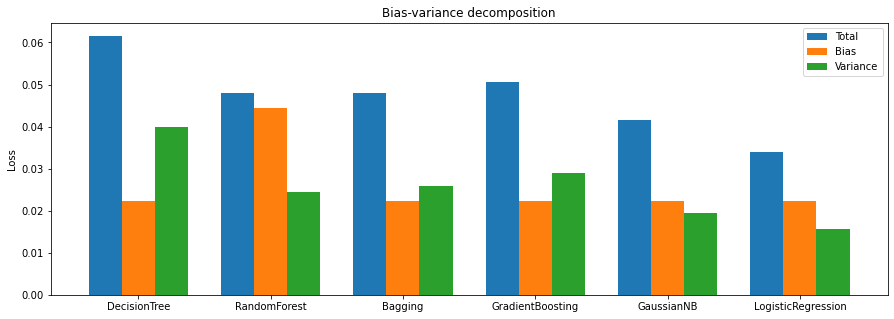

In [4]:
# plot results
c_names = list(classifiers.keys())
ind = np.arange(len(c_names))
width = 0.25
#
fig, (ax) = plt.subplots(figsize=(15, 5))
ax.bar(ind, avg_loss, width)
ax.bar(ind+width, avg_bias, width)
ax.bar(ind+2*width, avg_var, width)
ax.set_title('Bias-variance decomposition')
ax.set_xticks(ind + width)
ax.set_xticklabels(c_names)
ax.legend(['Total', 'Bias', 'Variance'])
ax.set_ylabel('Loss')
plt.show()